<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/Report_5_iris_dataset_PCA_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report 5. iris dataset을 이용한 차원축소 연습

 sklearn.datasets의 load_iris()사용 

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import  display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1) 3개의 주성분을 구하여  분산비율 확인

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = load_iris()
print("iris 일부 데이터: \n", iris.data[:5])

#iris 데이터의 특징값만 추출
iris2 =  iris.data

#데이터 표준화 
X = StandardScaler().fit_transform(iris2)

#주성분 모델 생성 맟 데이터 변환
pca = PCA(n_components=3) #주성분의 개수를 설정하여 객체 생성
PCs = pca.fit_transform(X) #주성분 모델로 데이터 변환

# 주성분 선형 변환된 데이터 프레임 구성
pcdf = pd.DataFrame(data=PCs, columns = ['PC1', 'PC2', 'PC3'])

# 주성분의 분산비율
print('pca.explained_variance_ratio_=', pca.explained_variance_ratio_)

iris 일부 데이터: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
pca.explained_variance_ratio_= [0.72962445 0.22850762 0.03668922]


# 2) PCA components 히트맵 그래프 

principal components (iris Data):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]


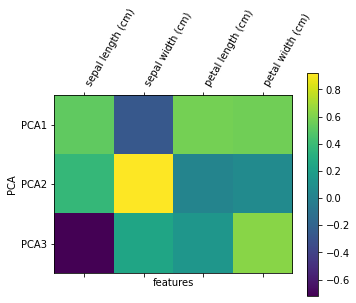

In [10]:
#principal components 
features = iris.feature_names

#principal components 
print("principal components (iris Data):")
print(pca.components_)

#principal components 그래프
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1,2], ["PCA1", "PCA2",  "PCA3"])
plt.colorbar()
plt.xticks(range(len(features)),
           features, rotation=60, ha='left')
plt.xlabel("features")
plt.ylabel("PCA")
plt.show()

# 3) 주성분 2개에 대한 붓꽃 종류별 scatter plot 

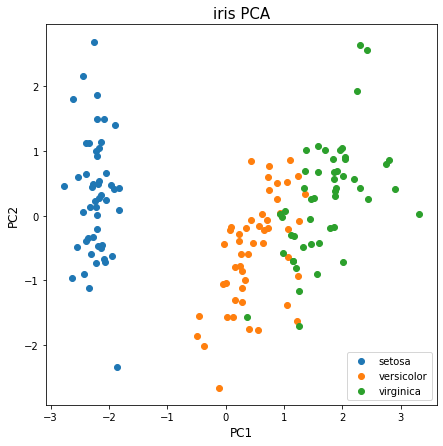

In [11]:
#붓꽃 종류 칼럼 추가 
pcdf['species'] = iris.target
grouped = pcdf.groupby('species')

#타입별  PC1, PC2 scatter plot 
lbl = iris.target_names
plt.figure(figsize=(7,7))
for name, group in grouped:
    plt.scatter(group.PC1, group.PC2,  label=name)
plt.legend(fontsize=12, loc='upper left') 
plt.title('iris PCA', fontsize=15)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(lbl, loc="best")
plt.show() 

# 4)전체 특징을 모두 사용한 데이터와 주성분 2개 만을 사용한 분류성능 확인

In [12]:
#iris 전체 데이터 모델 평가
X = iris.data
y = iris.target

print("iris Data")
print(X.shape)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5)

#k-NN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Xtrain, ytrain)           #학습데이터를 이용하여 모델링
acc = model.score(Xtest, ytest)  #테스트 데이터 예측결과에 대한 성능
print("테스트 세트의 정확도: {:.2f}".format(acc))

iris Data
(150, 4)
테스트 세트의 정확도: 0.95


In [13]:
#데이터를 2개 주성분으로 변환하여 2차원으로 축소한 모델 평가
X = pcdf[['PC1','PC2']]
y = pcdf['species']
print("iris PCA data")
print(X.shape)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=5)

#k-NN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Xtrain, ytrain)           #학습데이터를 이용하여 모델링
acc = model.score(Xtest, ytest)    #테스트 데이터 예측결과에 대한 성능
print("테스트 세트의 정확도: {:.2f}".format(acc))

iris PCA data
(150, 2)
테스트 세트의 정확도: 0.95
